# Week1 - Homework1 - Lifan Lin

## Preparations: Data, Packages

In [48]:
import matplotlib.pyplot as plt
# import packages
import pandas as pd
import numpy as np

In [49]:
# Since I run the notebook locally, I download it in advance.
data = pd.read_csv("./bikers_data.csv")
data

,Date,Number of bikers,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,Rainfall (in),Temp (F),dry day
0,2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.00,56.0,1
1,2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.00,56.5,1
2,2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.00,59.5,1
3,2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.00,60.5,1
4,2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.00,60.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,2019-12-27,4552.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.237706,0.01,41.0,0
2642,2019-12-28,3352.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.245532,0.00,44.0,1
2643,2019-12-29,3692.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.254701,0.01,45.5,0
2644,2019-12-30,7212.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.265207,0.04,45.5,0


## Selecting features

### drop columns

- `date`: I drop the date columns because we basically make the assumption that the number of bikers is independent of time. Also, we don't want to handle any time series data.
- Week col: Week columns are linear dependent, this could result in the singularity of matrix $X^TX$ and actually not necessary. For example, if the value from `Mon` to `Sat` are all 0, it could be deduced that the value of `Sun` is 1. So I drop this column.

In [50]:
# select columns
predictor_cols = data.columns[[2,3,4,5,6,7,9,10,11,13]]
# print(predictor_cols)
data_X = data[predictor_cols].to_numpy()
print("Predictor columns are: ", predictor_cols)
target_col = data.columns[1]
data_y = data[target_col].to_numpy()
print("Target column is: ", target_col)
# add a column of 1 to X_train and X_test, w_0
data_X = np.hstack((np.ones((data_X.shape[0], 1)), data_X))

Predictor columns are:  Index(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'holiday', 'daylight_hrs',
       'Rainfall (in)', 'dry day'],
      dtype='object')
Target column is:  Number of bikers


## a) Split the dataset into training and testing sets

80% for training and 20% for testing

In [51]:
# sampling the index
idx = np.arange(data_X.shape[0])
np.random.shuffle(idx)
idx_train = idx[:int(0.8*data_X.shape[0])]
idx_test = idx[int(0.8*data_X.shape[0]):]

# split the data
X_train, X_test, y_train, y_test = data_X[idx_train], data_X[idx_test], data_y[idx_train], data_y[idx_test]

In [52]:
# check the shape
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (2116, 11)
X_test shape:  (530, 11)
y_train shape:  (2116,)
y_test shape:  (530,)


## b) Fit a linear regression model to the training set


### i) linear model
Following the notation in the lecture, we have our linear model:
$$
y = X\mathbf{w} + \epsilon
$$
and
$$
\hat{y} = X\hat{\mathbf{w}}
$$
where
- $y$ is the target variable
- $X$ is the design matrix,

$$
X = \left[
\begin{matrix}
1 & x^1_1 & x^2_1 & \cdots & x^d_1 \\
1 & x^1_2 & x^2_2 & \cdots & x^d_2 \\
\vdots & \vdots \\
1 & x^1_n & x^2_n & \cdots & x^d_n \\
\end{matrix}
\right]
$$
- $\mathbf{w} = [w_0, w_1, \cdots , w_d] $ is the weight vector.

### ii) Normal equation
The normal equation is:
$$
XX^T\mathbf{w} = X^Ty
$$
and the solution is: (if $XX^T$ is invertible)
$$
\hat{\mathbf{w}} = (XX^T)^{-1}X^Ty
$$
now I will write it in codes
\

In [53]:
XTX = np.dot(X_train.T, X_train)
XTy = np.dot(X_train.T, y_train)
# use np.linalg.inv to solve the equation, it is much efficient than first compute the inverse of XTX and then multiply it with XTy
w_hat = np.linalg.solve(XTX, XTy)
print("The weight vector is: ")
w_hat

The weight vector is: 


array([-7152.87239471,  7585.47877493,  8166.42003746,  8025.2276315 ,
        7444.9167645 ,  6110.02943514,   415.08231447, -4620.26303847,
         985.59847334, -2443.06878355,  2544.14731593])

## c) Predict and Evaluate

### i) Predict

Linear model predict y by
$$
\hat{y} = X\hat{\mathbf{w}}
$$


In [54]:
# predict on both train set and test set
y_pred_train = np.dot(X_train, w_hat)
y_pred_test = np.dot(X_test, w_hat)
# evaluate the training error and testing error, using L2 norm
mse_train = np.mean((y_pred_train - y_train)**2)
mse_test = np.mean((y_pred_test - y_test)**2)
print("The Mean Squared Error on training set is: ", mse_train)
print("The Mean Squared Error on testing set is: ", mse_test)

# evaluate with L1 norm
abs_e_train = np.mean(np.abs(y_pred_train - y_train))
abs_e_test = np.mean(np.abs(y_pred_test - y_test))
print("The Mean Absolute Error on training set is: ", abs_e_train)
print("The Mean Absolute Error on testing set is: ", abs_e_test)

The Mean Squared Error on training set is:  6578264.79546095
The Mean Squared Error on testing set is:  5825060.888046549
The Mean Absolute Error on training set is:  1987.6154885972314
The Mean Absolute Error on testing set is:  1839.221506837802


### ii) Evaluate

#### The difference between loss on training set and testing set

The model is trained on training dataset, and the loss makes the model capture as much information as possible from the training dataset. However, some features in the training dataset may not be generalized to the testing dataset. So the loss on testing dataset will be larger than the loss on training dataset.

But here our testing loss is instead slightly lower than the testing loss, implying that the model is not overfitting.




#### Simple Model Diagnosis

Only look into the MSE or the MAE is not enough, because they can be scaled up by the data itself, and we cannot see whether the model is good or not.
I found that the following criterion is somehow "accuracy-like" and may be use to evaluate the overall performance of models.
In statistics, a basic criterion is to find how well our linear model can explain the variance of the data. This is what so-called $R^2$ score.
$$
R^2 \\
= 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} = 1 - \frac{MSE}{Var(y)}\\
= \frac{MSR}{MST} =
\frac{\text{Variance explained by the model}}{\text{Total variance in the data}}
$$
where $\bar{y}$ is the mean of $y$.

In [55]:
# calculate R2 score
R2_train = 1 - mse_train / np.var(y_train)
print("The R2 score on training set is: ", R2_train)
R2_test = 1 - mse_test / np.var(y_test)
print("The R2 score on testing set is: ", R2_test)

The R2 score on training set is:  0.7840792238547201
The R2 score on testing set is:  0.790885173055867


My model achieves a $R^2$ score of 0.77, this is relatively good.

### Residual Plot
We can used residual plot to diagnose the model. If our model works well, the residual should be gaussian distributed.

(array([  2.,   3.,  14.,  25.,  48.,  74., 161., 299., 364., 374., 279.,
        228., 127.,  68.,  23.,  15.,   7.,   2.,   2.,   1.]),
 array([-9846.12072755, -8778.77838511, -7711.43604268, -6644.09370025,
        -5576.75135782, -4509.40901539, -3442.06667295, -2374.72433052,
        -1307.38198809,  -240.03964566,   827.30269677,  1894.64503921,
         2961.98738164,  4029.32972407,  5096.6720665 ,  6164.01440894,
         7231.35675137,  8298.6990938 ,  9366.04143623, 10433.38377866,
        11500.7261211 ]),
 <BarContainer object of 20 artists>)

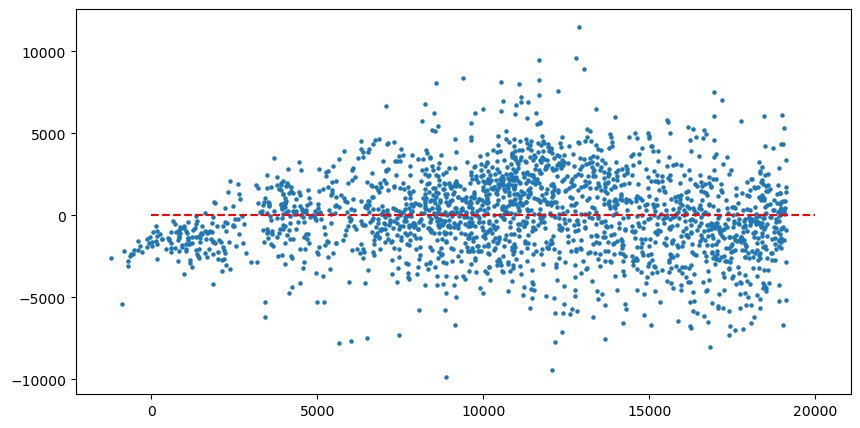

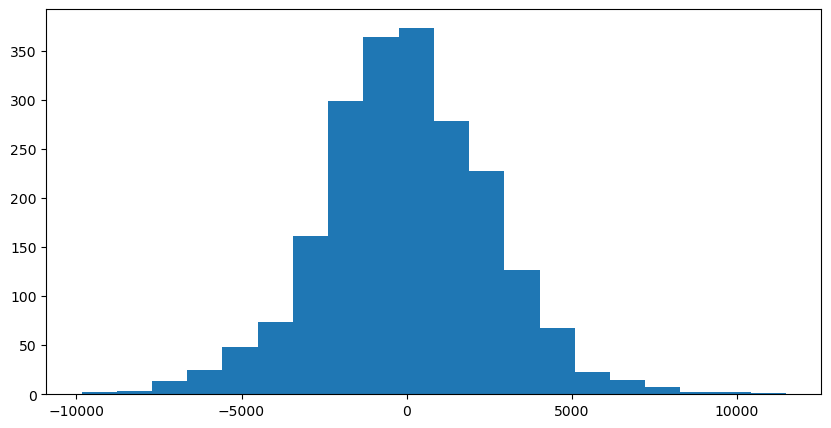

In [56]:
# plot the residual
plt.figure(figsize=(10,5))
residual_train = y_pred_train - y_train
plt.scatter(y_pred_train, residual_train,s=5)
plt.hlines(y=0, xmin=0, xmax=20000, colors='r', linestyles='--')
plt.figure(figsize=(10,5))
plt.hist(residual_train, bins=20)

The residual plot and histogram shows that the residual has a gaussian and 0-centered distribution, which fits well to the model's assumption.

## d) The expected number of bikers on a
- dry day
- Monday
- non-holiday
- 0 inches of rain
- 10.5 hours of daylight

In [57]:
# in the condition given, we have a whole set of predictors
# then we just need to feed it into our model
x_new = np.array([1,1,0,0,0,0,0,0,10.5,0,1])
# columns are ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'holiday', 'daylight_hrs','Rainfall (in)', 'dry day']
y_new = np.dot(x_new, w_hat)
print("The expected number of bikers is: ", y_new)

The expected number of bikers is:  13325.537666245671


# Repeat the Procedure above

In [58]:
# select columns
predictor_cols = data.columns[[2,3,4,5,6,7,9,10,11,12,13]]
# print(predictor_cols)
data_X = data[predictor_cols].to_numpy()
print("Predictor columns are: ", predictor_cols)
target_col = data.columns[1]
data_y = data[target_col].to_numpy()
print("Target column is: ", target_col)
# add a column of 1 to X_train and X_test
data_X = np.hstack((np.ones((data_X.shape[0], 1)), data_X))
# sampling the index
idx = np.arange(data_X.shape[0])
np.random.shuffle(idx)
idx_train = idx[:int(0.8*data_X.shape[0])]
idx_test = idx[int(0.8*data_X.shape[0]):]

# split the data
X_train, X_test, y_train, y_test = data_X[idx_train], data_X[idx_test], data_y[idx_train], data_y[idx_test]
# check the shape
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

Predictor columns are:  Index(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'holiday', 'daylight_hrs',
       'Rainfall (in)', 'Temp (F)', 'dry day'],
      dtype='object')
Target column is:  Number of bikers
X_train shape:  (2116, 12)
X_test shape:  (530, 12)
y_train shape:  (2116,)
y_test shape:  (530,)


In [59]:
# Solve linear model
XTX = np.dot(X_train.T, X_train)
XTy = np.dot(X_train.T, y_train)
# use np.linalg.inv to solve the equation, it is much efficient than first compute the inverse of XTX and then multiply it with XTy
w_hat = np.linalg.solve(XTX, XTy)
print("The weight vector is: ")
w_hat

The weight vector is: 


array([-9834.6682509 ,  7354.98261253,  7885.53493   ,  7784.68822175,
        7373.98906942,  5939.07755369,   286.16173026, -5131.64264949,
         418.61987504, -2714.95232829,   181.39139145,  2151.97519366])

In [60]:
# predict on both train set and test set
y_pred_train = np.dot(X_train, w_hat)
y_pred_test = np.dot(X_test, w_hat)
# evaluate the training error and testing error, using L2 norm
mse_train = np.mean((y_pred_train - y_train)**2)
mse_test = np.mean((y_pred_test - y_test)**2)
print("The Mean Squared Error on training set is: ", mse_train)
print("The Mean Squared Error on testing set is: ", mse_test)

# evaluate with L1 norm
abs_e_train = np.mean(np.abs(y_pred_train - y_train))
abs_e_test = np.mean(np.abs(y_pred_test - y_test))
print("The Mean Absolute Error on training set is: ", abs_e_train)
print("The Mean Absolute Error on testing set is: ", abs_e_test)

The Mean Squared Error on training set is:  4836522.047106669
The Mean Squared Error on testing set is:  5263152.117442945
The Mean Absolute Error on training set is:  1685.1293615952002
The Mean Absolute Error on testing set is:  1741.0998424132886


In [61]:
# calculate R2 score
R2_train = 1 - mse_train / np.var(y_train)
print("The R2 score on training set is: ", R2_train)
R2_test = 1 - mse_test / np.var(y_test)
print("The R2 score on testing set is: ", R2_test)

The R2 score on training set is:  0.8402493562003039
The R2 score on testing set is:  0.81794630957833


### Comments: new model

After adding the new predictor `temp`, all training error, testing error and $R^2$ score are improved. This can indicate a better model.
But such enhancement is at the cost of increase of complexity of the model, and we may risk overfitting.
In fact, if we look at the difference between training error and testing error of two models:
- old model:
    - training error: 1963
    - testing error: 1912
- new model:
    - training error: 1685
    - testing error: 1731

The new model starts behaving like overfitting, as a result of introduction of new predictor.

In [62]:
# in the condition given, we have a whole set of predictors
# then we just need to feed it into our model
# Suppose we have a temperature of 60 degree
x_new = np.array([1,1,0,0,0,0,0,0,10.5,0,60,1])
# columns are ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'holiday', 'daylight_hrs','Rainfall (in)', 'dry day']
y_new = np.dot(x_new, w_hat)
print("The expected number of bikers is: ", y_new)

The expected number of bikers is:  14951.2817302237


The expected number of bikers changes as temperature is added as a predictor. This prediction might be more accurate, though we don't have the ground truth. But it's always good to include more information.

# Further improvement

## a) Extend the linear model to include a quadratic term
In above model, we assume a linear relationship between the predictors and the target. But in reality, the relationship might be more complicated. So we can extend the linear model to include a quadratic term.

To avoid the explosion of complexity, we only add quadratic term to the `temp` and `daylight_hrs` predictors.

In [73]:
data_X

array([[ 1.        ,  0.        ,  0.        , ..., -0.30359148,
        -0.21359226, -0.03604185],
       [ 1.        ,  0.        ,  0.        , ..., -0.30573387,
        -0.21359226,  0.01023439],
       [ 1.        ,  0.        ,  0.        , ..., -0.24393482,
        -0.21359226,  0.3055009 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -1.13138863,
        -0.21336055, -0.82990928],
       [ 1.        ,  1.        ,  0.        , ..., -1.12976324,
        -0.20988494, -0.82990928],
       [ 1.        ,  0.        ,  1.        , ..., -1.07152343,
        -0.04318824, -0.56576335]])

In [64]:
data_X_quad = np.hstack((data_X, data_X[:,[8]]**2, data_X[:,[10]]**2, data_X[:,[8]]*data_X[:,[10]]))

In [65]:
# fit a linear model
X_train_quad, X_test_quad, y_train_quad, y_test_quad = data_X_quad[idx_train], data_X_quad[idx_test], data_y[idx_train], data_y[idx_test]

w_hat_quad = np.linalg.solve(np.dot(X_train_quad.T, X_train_quad), np.dot(X_train_quad.T, y_train_quad))

In [66]:
# R2 score
y_pred_train_quad = np.dot(X_train_quad, w_hat_quad)
y_pred_test_quad = np.dot(X_test_quad, w_hat_quad)
R2_train_quad = 1 - np.mean((y_pred_train_quad - y_train_quad)**2) / np.var(y_train_quad)
R2_test_quad = 1 - np.mean((y_pred_test_quad - y_test_quad)**2) / np.var(y_test_quad)
print("The R2 score on training set is: ", R2_train_quad)
print("The R2 score on testing set is: ", R2_test_quad)

# MSE
mse_train_quad = np.mean((y_pred_train_quad - y_train_quad)**2)
mse_test_quad = np.mean((y_pred_test_quad - y_test_quad)**2)
print("The Mean Squared Error on training set is: ", mse_train_quad)
print("The Mean Squared Error on testing set is: ", mse_test_quad)


The R2 score on training set is:  0.846563111654724
The R2 score on testing set is:  0.8256635329708899
The Mean Squared Error on training set is:  4645370.28252517
The Mean Squared Error on testing set is:  5040048.040039978


It seems that the model is not better than the previous one.

## b) Extend the linear model to include a term of 4th order

### slice the data and create 4th-order term

In [67]:
data = pd.read_csv("bikers_data.csv")
data = data.values

In [68]:
predictor_cols = [2,3,4,5,6,7,9,10,11,12,13]
power_col = [10,11,12]

In [69]:
data_X = data[:,predictor_cols]
data_y = data[:,1]
# add interaction term
data_X = np.hstack((np.ones((data_X.shape[0],1)), data_X))

# add order 2, 3, 4
for i in power_col:
    data_X = np.hstack((data_X, data[:,[i]]**2, data[:,[i]]**3))

# Interaction
data_X = np.hstack((data_X, data[:,[10]]*data[:,[11]],
                    data[:,[10]]*data[:,[12]],
                    data[:,[11]]*data[:,[12]]))
for i in [10,11,12]:
    for j in [10,11,12]:
        data_X = np.hstack((data_X, data[:,[i]]*data[:,[j]]**2))


# Centralize continuous variables
for col in range(8,data_X.shape[1]):
    data_X[:,col] = (data_X[:,col] - np.mean(data_X[:,col])) / np.std(data_X[:,col])

data_X = data_X.astype(float)
data_y = data_y.astype(float)


idx = np.arange(data_X.shape[0])
np.random.shuffle(idx)
idx_train, idx_val, idx_test = idx[:int(0.6*data_X.shape[0])], idx[int(0.6*data_X.shape[0]):int(0.8*data_X.shape[0])], idx[int(0.8*data_X.shape[0]):]

X_train, X_test, y_train, y_test, X_val, y_val = data_X[idx_train], data_X[idx_test], data_y[idx_train], data_y[idx_test], data_X[idx_val], data_y[idx_val]

#print size
print("The size of training set is: ", X_train.shape)
print("The size of testing set is: ", X_test.shape)


The size of training set is:  (1587, 30)
The size of testing set is:  (530, 30)


### Add L2-penalty to Loss
As # of features increase in our model, we may have a problem of overfitting. Hence I used ridge regression. I select the best hyperparameter $\lambda$ on validation set(20%), and test it on test set.
Here I write a function to run the linear regression with different lambda

In [70]:
def ridge_regression(lamda):
    # sampling the index
    # idx = np.arange(data_X.shape[0])
    # np.random.shuffle(idx)

    # the penalty is not on the intercept
    p = np.eye(X_train.shape[1])
    p[0,0] = 0
    A = np.dot(X_train.T, X_train)+lamda*p
    B = np.dot(X_train.T, y_train)


    w_hat = np.linalg.solve(A, B)
    y_pred_train = np.dot(X_train, w_hat)
    y_pred_val = np.dot(X_val, w_hat)

    # MSE
    rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
    rmse_val = np.sqrt(np.mean((y_pred_val - y_val)**2))
    return rmse_train, rmse_val

Text(0.5, 1.0, 'Training and Validation Error vs $\\lambda$')

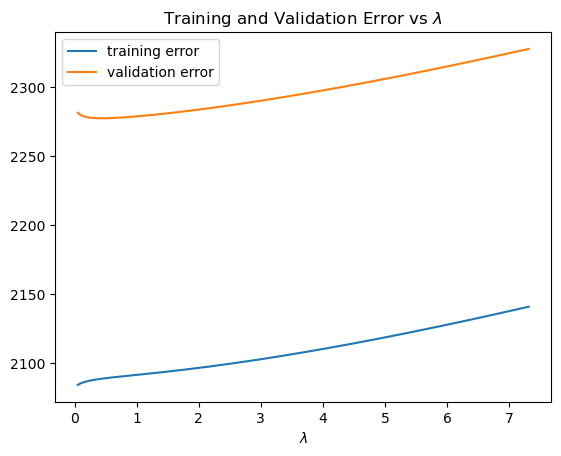

In [71]:
lambda_list = np.exp(np.arange(-3, 2, 0.01))
train_err, val_err = [], []
for lamda in lambda_list:
    mse_train, mse_test = ridge_regression(lamda)
    # print(lamda)
    train_err.append(mse_train)
    val_err.append(mse_test)

plt.plot(lambda_list, train_err, label="training error")
plt.plot(lambda_list, val_err, label="validation error")
plt.legend()
plt.xlabel("$\lambda$")
plt.title("Training and Validation Error vs $\lambda$")

### Choose the best lambda, then I should report the performance on the test set

In [74]:
best_lambda = lambda_list[np.argmin(val_err)]
print("The best lambda is: ", best_lambda)

p = np.eye(X_train.shape[1])
p[0,0] = 0
A = np.dot(X_train.T, X_train)+best_lambda*p
B = np.dot(X_train.T, y_train)


w_hat = np.linalg.solve(A, B)
y_pred_test = np.dot(X_test, w_hat)
# MSE
mae_test = np.mean(np.abs(y_pred_test - y_test))

print("The Mean Absolute Error on testing set is: ", mae_test)




The best lambda is:  0.4360492863215154
The Mean Absolute Error on testing set is:  1645.1120603277593
